# 5003 HW7

ZHANG Juntao -20908272

## HW-7A

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from random import randint
import random
import itertools

### Simulation

In [2]:
df = yf.download('^HSI', start="2021-11-21", end="2022-11-22")
data = df[['Adj Close']].values.ravel()

[*********************100%***********************]  1 of 1 completed


In [3]:
n, m, s = 101, 3, 2
dim = 2**m
beta = 0.5

Pt = np.concatenate(([data[0]], beta*np.diff(data)+data[:len(data)-1]))
bt = np.diff(data)
bt = np.where(bt>0, 1, bt)
bt = np.where(bt<0, 0, bt)
mu = [0]
for i in range(len(bt)):
    mu.append((2 * mu[i] + bt[i]) % dim)

In [4]:
def simu_dec(loops):
    d_list = []
    d_len=2**dim
    for numbers in itertools.product([-1, 1], repeat=dim):
        d_list.append(list(numbers))
    money = np.zeros(d_len*(loops+1))
    for item in range(len(money)): 
        money[item] = 5*data[0]
    money = money.reshape(d_len,loops+1)
    place = np.zeros((d_len, loops+1))
    decision = np.zeros(d_len)
    for item in range(loops):
        for i in range(d_len):
            decision[i] = d_list[i][int(mu[item+1])]
            place[i][item+1] = max(min(place[i][item] + decision[i], money[i][item] / data[item]), -money[i][item] / data[item])
            money[i][item+1] = money[i][item]+place[i][item]*(Pt[item+1]-Pt[item])
    return money

def choose(v, s):
    res = np.zeros((v.shape[0], s.shape[2]), dtype=int)
    for i in range(v.shape[0]):
        index = np.random.choice(np.argwhere(v[i] == np.max(v[i])).T[0])
        res[i] = s[i, index]
    return res

def simu_wg():
    T = len(data)
    strategies = np.zeros(101*2*8)
    for i in range(len(strategies)):
        strategies[i] = random.choice((-1, 1))
    strategies = strategies.reshape(101, 2, 8)
    visual_wealth = np.zeros((T, 101, 2))
    visual_wealth[0,:,:] = 5*data[0]
    visual_position = np.zeros((T, 101, 2))
    real_wealth = np.zeros((T, 101))
    real_wealth[0, :] = 5*data[0]
    real_position = np.zeros((T, 101))
    for t in range(T-1):
        chosen = choose(visual_wealth[t], strategies)
        real_decision = chosen[:, int(mu[t])]
        visual_decision = strategies[:,:, int(mu[t])]
        visual_position[t+1] = np.maximum(np.minimum(visual_position[t] + visual_decision, visual_wealth[t] / data[t]), 
                                          -visual_wealth[t] / data[t])
        visual_wealth[t+1] = visual_wealth[t]+visual_position[t]*(Pt[t+1]-Pt[t])
        real_position[t+1] = np.maximum(np.minimum(real_position[t] + real_decision, real_wealth[t] / data[t]),
                                        -real_wealth[t] / data[t])
        real_wealth[t+1] = real_wealth[t]+real_position[t]*(Pt[t+1]-Pt[t])
    return real_wealth

In [5]:
dec_money = sorted(simu_dec(len(mu)-1),key=lambda item: item[-1])
dec_money0 = np.array(dec_money)[:, -1]
for i in range(len(dec_money)): 
    dec_money0[i] = dec_money0[i]/(5*data[0])
dec_money0 = sorted(dec_money0)
mean_vir = np.mean(dec_money0)
agent_money = simu_dec(len(mu)-1)
agent_money = sorted(agent_money,key=lambda item: item[-1])
agent_money0 = np.array(agent_money)[:, -1]
for i in range(len(agent_money)):
    agent_money0[i] = agent_money0[i]/(5*data[0])
agent_money0 = sorted(agent_money0)
mean_vir = np.mean(agent_money0)

### Presentation of results and discussions

Problem 12

In [6]:
print('Best real wealth is:', np.max(agent_money[-1])/(5*data[0]))
print('Worst real wealth is:', np.min(agent_money[-1])/(5*data[0]))
print('Average real wealth is:', np.mean(agent_money[-1])/(5*data[0]))
print('Best visual wealth is:',dec_money0[-1])
print('Worst visual wealth is:',dec_money0[0])
print('Average visual wealth is:', np.mean(dec_money0))

Best real wealth is: 1.6865467236541911
Worst real wealth is: 0.9820968892621532
Average real wealth is: 1.2052027873506554
Best visual wealth is: 1.4118040292085074
Worst visual wealth is: 0.6259648349605802
Average visual wealth is: 0.9923164176285972


Problem 13

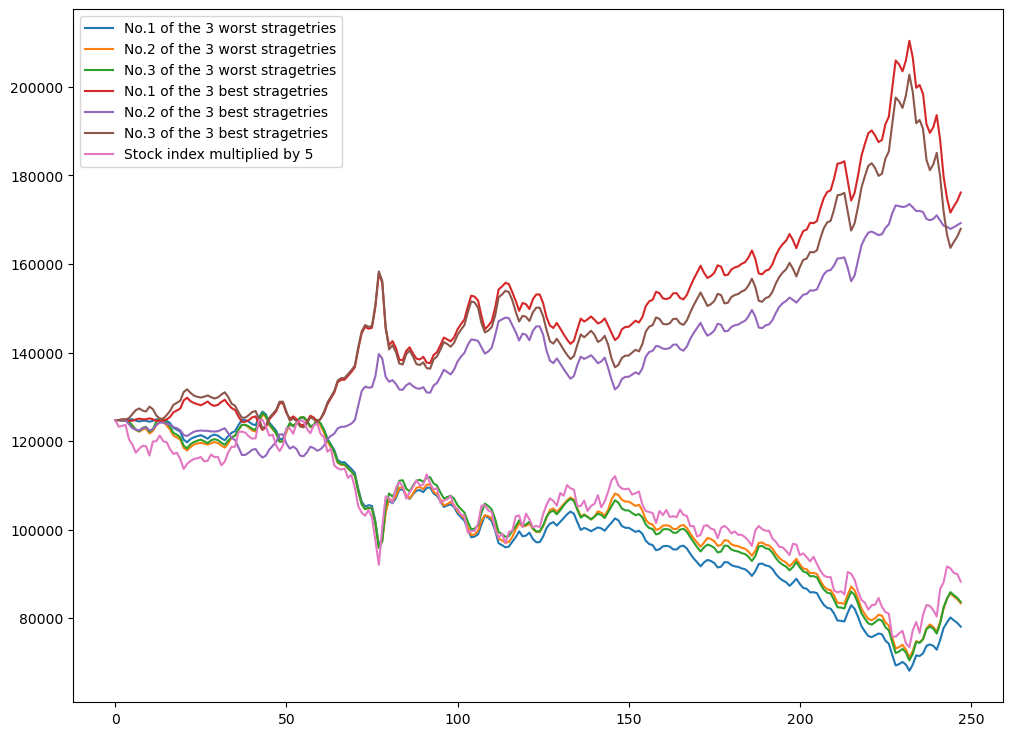

In [7]:
t = [i for i in range(len(dec_money[0]))]
plt.figure(figsize=(12,9))
plt.plot(t, dec_money[0], label='No.1 of the 3 worst stragetries')
plt.plot(t, dec_money[1], label='No.2 of the 3 worst stragetries')
plt.plot(t, dec_money[2], label='No.3 of the 3 worst stragetries')
plt.plot(t, dec_money[-1],label='No.1 of the 3 best stragetries')
plt.plot(t, dec_money[-2],label='No.2 of the 3 best stragetries')
plt.plot(t, dec_money[-3],label='No.3 of the 3 best stragetries')
plt.plot(t, 5*data, label='Stock index multiplied by 5')
plt.legend()
plt.show()

Problem 14

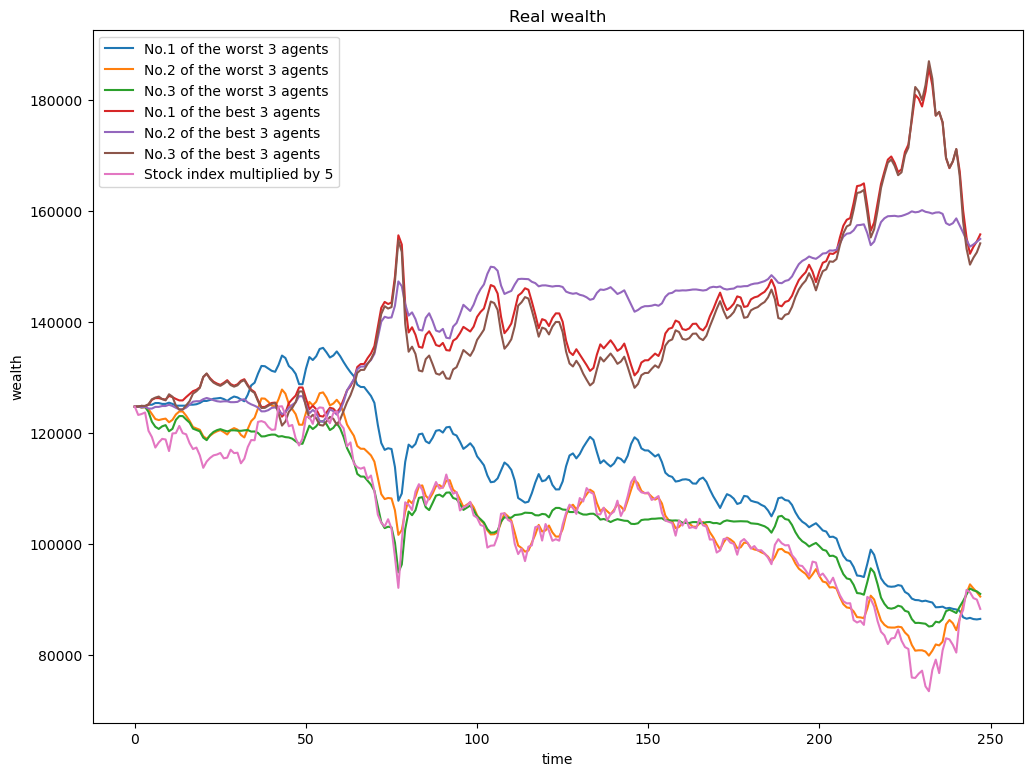

In [8]:
agent_money = simu_wg()
agent_money = agent_money[:,np.argsort(agent_money[-1])]
t = [i for i in range(len(agent_money[:,0]))]
plt.figure(figsize=(12,9))
plt.plot(t, agent_money[:,0], label="No.1 of the worst 3 agents")
plt.plot(t, agent_money[:,1], label="No.2 of the worst 3 agents")
plt.plot(t, agent_money[:,2], label="No.3 of the worst 3 agents")
plt.plot(t, agent_money[:,-1],label="No.1 of the best 3 agents")
plt.plot(t, agent_money[:,-2],label="No.2 of the best 3 agents")
plt.plot(t, agent_money[:,-3],label="No.3 of the best 3 agents")
plt.plot(t, 5*data,label="Stock index multiplied by 5")
plt.legend()
plt.xlabel("time")
plt.ylabel("wealth")
plt.title("Real wealth")
plt.show()

Problem 15

We can see that the real wealth figure is more changeable than the virtual wealth figure. And in some periods, even the worest agent has more wealth than the best agent, so I think there doesn't exist permanent best strategies, differnet strategies has its advantages in different situation. Therefore, it's needed for an agent to change strategy when the environment changes.

## HW-7B: Portfolio Management with PCA

### Part 1

Problem 1

In [9]:
df1 = pd.DataFrame()
stock_list = ['^GSPC', 'MSFT', 'AAPL', 'AMZN','GOOGL', 'TSLA', 'GOOG', 'META', 'NVDA', 'BRK-B', 'JPM']
for stock in stock_list:#Use the loop to get all the stock we need
    data = yf.download(stock, start="2021-11-28", end="2022-11-28", threads=False)
    df1[stock] = data["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
return1 = df1.apply(np.log).diff()
return1

,^GSPC,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
Date,,,,,,,,,,,
2021-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,-0.019143,-0.018106,0.031089,-0.015421,-0.025281,0.006811,-0.025382,-0.040972,-0.021196,-0.019435,-0.014998
2021-12-01,-0.011886,-0.001544,-0.003211,-0.018229,-0.005980,-0.044441,-0.005872,-0.043656,-0.038597,-0.006127,-0.005936
2021-12-02,0.014095,-0.001789,-0.006149,-0.001849,0.013482,-0.009543,0.015127,-0.000676,0.021744,0.014763,0.020809
2021-12-03,-0.008484,-0.019863,-0.011794,-0.013936,-0.006769,-0.066352,-0.008774,-0.011503,-0.045631,-0.005966,-0.018279
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,0.004747,-0.001905,0.003775,-0.007514,-0.009500,-0.016403,-0.007132,0.005369,-0.017243,0.010741,0.009761
2022-11-21,-0.003891,0.003435,-0.021919,-0.018007,-0.018961,-0.070822,-0.020349,-0.019738,-0.005988,0.001415,-0.005920
2022-11-22,0.013489,0.012236,0.014555,0.007972,0.015054,0.012079,0.015531,0.014280,0.045998,0.014547,0.014846


Problem 2

In [11]:
cor_matrix = return1.drop(columns=['^GSPC']).corr()
cor_matrix

,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
MSFT,1.000000,0.810413,0.729019,0.844061,0.576430,0.839346,0.594170,0.771784,0.610832,0.512967
AAPL,0.810413,1.000000,0.683968,0.776904,0.668603,0.769650,0.556775,0.748972,0.641247,0.528112
AMZN,0.729019,0.683968,1.000000,0.717235,0.601187,0.719412,0.589946,0.697680,0.544159,0.496756
GOOGL,0.844061,0.776904,0.717235,1.000000,0.564512,0.997506,0.647684,0.765353,0.609479,0.516643
TSLA,0.576430,0.668603,0.601187,0.564512,1.000000,0.558566,0.392082,0.690754,0.398875,0.382005
GOOG,0.839346,0.769650,0.719412,0.997506,0.558566,1.000000,0.649263,0.761417,0.605628,0.513054
META,0.594170,0.556775,0.589946,0.647684,0.392082,0.649263,1.000000,0.564882,0.411686,0.378476
NVDA,0.771784,0.748972,0.697680,0.765353,0.690754,0.761417,0.564882,1.000000,0.551854,0.521554
BRK-B,0.610832,0.641247,0.544159,0.609479,0.398875,0.605628,0.411686,0.551854,1.000000,0.706998
JPM,0.512967,0.528112,0.496756,0.516643,0.382005,0.513054,0.378476,0.521554,0.706998,1.000000


Problem 3

In [12]:
eigvals,eigvecs = np.linalg.eigh(np.array(cor_matrix))
with np.printoptions(precision=3):
    print("Eigenvalues:\n",eigvals)
    print("Eigenvectors:\n",eigvecs)

Eigenvalues:
 [2.375e-03 1.510e-01 2.218e-01 2.406e-01 3.047e-01 3.295e-01 4.698e-01
 6.763e-01 8.778e-01 6.726e+00]
Eigenvectors:
 [[ 8.328e-03  7.487e-01 -2.411e-01 -3.955e-01 -7.809e-02  7.331e-02
   2.820e-01 -6.521e-02  9.336e-02  3.477e-01]
 [ 9.396e-03 -5.248e-01 -5.102e-01 -2.470e-01 -4.274e-01 -2.280e-01
   1.566e-01  1.626e-01  3.444e-02  3.411e-01]
 [-9.917e-03 -1.489e-01 -6.892e-03  2.850e-02 -1.123e-01  8.850e-01
  -2.548e-01  3.653e-02  1.086e-01  3.209e-01]
 [-7.122e-01 -1.009e-01  2.378e-02  3.438e-01  2.371e-01 -4.440e-02
   3.362e-01 -2.232e-01  1.284e-01  3.554e-01]
 [ 3.828e-03  2.485e-01 -8.501e-03  4.249e-01 -1.973e-02 -2.114e-01
  -2.742e-01  7.108e-01  2.386e-01  2.741e-01]
 [ 7.018e-01 -1.072e-01  3.307e-02  3.560e-01  2.440e-01 -2.966e-02
   3.325e-01 -2.333e-01  1.315e-01  3.542e-01]
 [-1.872e-03  6.535e-02  1.036e-02  1.819e-03 -1.518e-01 -3.037e-01
  -6.654e-01 -5.572e-01  2.304e-01  2.719e-01]
 [ 1.380e-03 -2.145e-01  5.756e-01 -5.718e-01  3.235e-01 -1.259

Problem 4

In [13]:
with np.printoptions(precision=3):
    print("eigenvalues:\n",eigvals[::-1])
    print("eigenvectors:\n",eigvecs[:,::-1])

eigenvalues:
 [6.726e+00 8.778e-01 6.763e-01 4.698e-01 3.295e-01 3.047e-01 2.406e-01
 2.218e-01 1.510e-01 2.375e-03]
eigenvectors:
 [[ 3.477e-01  9.336e-02 -6.521e-02  2.820e-01  7.331e-02 -7.809e-02
  -3.955e-01 -2.411e-01  7.487e-01  8.328e-03]
 [ 3.411e-01  3.444e-02  1.626e-01  1.566e-01 -2.280e-01 -4.274e-01
  -2.470e-01 -5.102e-01 -5.248e-01  9.396e-03]
 [ 3.209e-01  1.086e-01  3.653e-02 -2.548e-01  8.850e-01 -1.123e-01
   2.850e-02 -6.892e-03 -1.489e-01 -9.917e-03]
 [ 3.554e-01  1.284e-01 -2.232e-01  3.362e-01 -4.440e-02  2.371e-01
   3.438e-01  2.378e-02 -1.009e-01 -7.122e-01]
 [ 2.741e-01  2.386e-01  7.108e-01 -2.742e-01 -2.114e-01 -1.973e-02
   4.249e-01 -8.501e-03  2.485e-01  3.828e-03]
 [ 3.542e-01  1.315e-01 -2.333e-01  3.325e-01 -2.966e-02  2.440e-01
   3.560e-01  3.307e-02 -1.072e-01  7.018e-01]
 [ 2.719e-01  2.304e-01 -5.572e-01 -6.654e-01 -3.037e-01 -1.518e-01
   1.819e-03  1.036e-02  6.535e-02 -1.872e-03]
 [ 3.358e-01  1.294e-01  2.123e-01 -2.576e-02 -1.259e-01  3.235

Problem 5

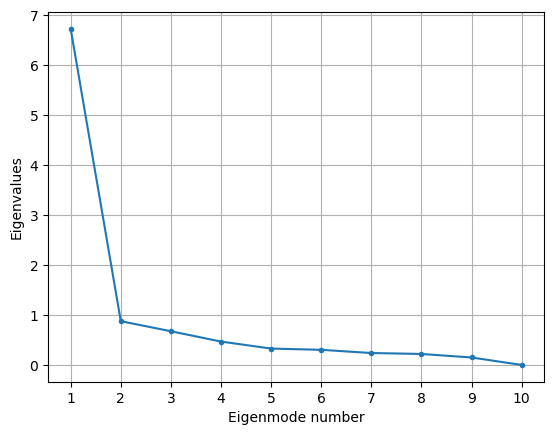

In [14]:
plt.plot(np.arange(1,11,1), eigvals[::-1], marker='.')
plt.grid(True)
plt.xlabel("Eigenmode number")
plt.ylabel("Eigenvalues")
plt.xticks(np.arange(1,11,1))
plt.show()

Problem 7

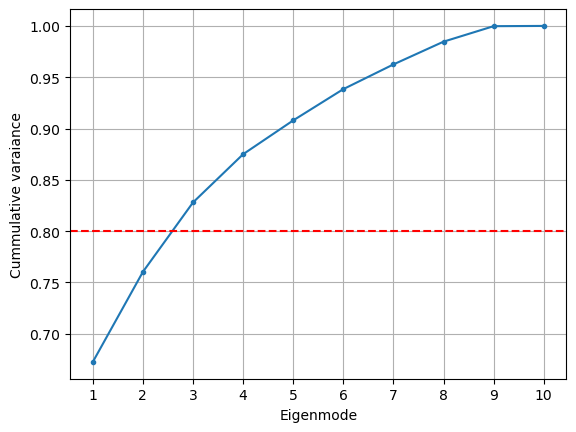

In [15]:
plt.plot(np.arange(1,11,1), np.cumsum(eigvals[::-1])/sum(eigvals[::-1]), marker='.')
plt.grid(True)
plt.xlabel("Eigenmode")
plt.ylabel("Cummulative varaiance")
plt.axhline(0.8,ls='--',c='red')
plt.xticks(np.arange(1,11,1))
plt.show()

From the above figure, we can determine that N=3

### Part 2: Cluster Visualization

Problem 8

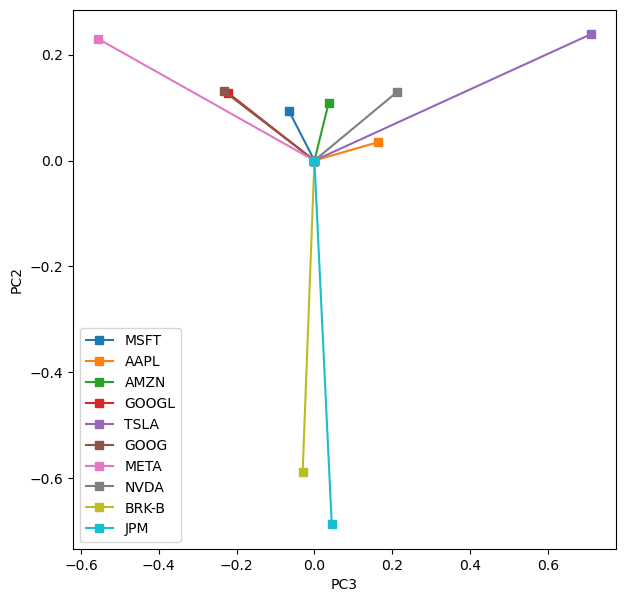

In [16]:
PC2 = eigvecs[:,::-1][:,1]
PC3 = eigvecs[:,::-1][:,2]
plt.figure(figsize=(7,7))
for i in range(len(stock_list[1:])):
    plt.plot((0,PC3[i]),(0,PC2[i]),marker='s',label=stock_list[i+1])
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.legend()
plt.show()

Consider three clusters: 

1. BRK_B, JPM(Financial service);

2. APPL, TSLA, NVDA, AMZN(Information technology);

3. GOOG, GOOGL, META, MSFT(Internet science and technology).

As we state above, the clustering results provide a meaningful economic taxonomy.

### Part 3: Diversification Strategies

#### A: Stock investment with equal weight

Problem 9

In [17]:
df2 = df1.drop(columns=['^GSPC'])
# Get the volume of stocks to be invested
volume = pd.DataFrame(columns = stock_list[1:])
vol = 0.1 / df2.iloc[0].values
volume.loc['volume'] = vol
# Get total value of protfolio
protfolio = np.zeros(len(df2))
for i in range(len(df2)):
    protfolio[i] = np.sum(df2.iloc[i].values * vol)
df2['Protfolio'] = protfolio
EWS = df2[['Protfolio']]

In [18]:
volume

,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
volume,0.0003,0.000628,0.000562,0.000687,0.000264,0.000684,0.000296,0.0003,0.000354,0.00064


In [19]:
EWS

,Protfolio
Date,
2021-11-29,1.000000
2021-11-30,0.985989
2021-12-01,0.969210
2021-12-02,0.975622
2021-12-03,0.955773
...,...
2022-11-18,0.676718
2022-11-21,0.666835
2022-11-22,0.677587


#### B: Risk Parity

Problem 10

In [20]:
df2 = df1.drop(columns=['^GSPC'])
# Get weight and volume
returns = df2.applymap(np.log).diff().dropna(how='any', axis=0)
reverse = 1/np.std(returns).values
weight = reverse / np.sum(reverse)
B = pd.DataFrame(columns=stock_list[1:])
B.loc['weight'] = weight
B.loc['volume'] = weight / df2.iloc[0].values
# Get total value of protfolio
pro = np.zeros(len(df2))
for i in range(len(df2)):
    pro[i] = np.sum(df2.iloc[i].values * weight / df2.iloc[0].values)
df2['Protfolio'] = pro
RE = df2[['Protfolio']]

In [21]:
B

,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
weight,0.112734,0.111305,0.079591,0.103943,0.060366,0.103685,0.059356,0.062074,0.175064,0.131883
volume,0.000338,0.000699,0.000447,0.000714,0.000159,0.000710,0.000176,0.000186,0.000621,0.000844


In [22]:
RE

,Protfolio
Date,
2021-11-29,1.000000
2021-11-30,0.986476
2021-12-01,0.974131
2021-12-02,0.981939
2021-12-03,0.965388
...,...
2022-11-18,0.751127
2022-11-21,0.742749
2022-11-22,0.754156


#### C: Equal Weight Portfolio

Problem 11

In [23]:
eigvals,eigvecs = np.linalg.eigh(np.array(cor_matrix))
projections = np.dot(np.ones(10)/10, eigvecs[:,::-1])
projections

array([ 3.14108355e-01, -1.80257717e-02,  5.76835213e-03, -2.88942476e-02,
       -6.72501170e-03, -1.85265392e-03,  7.63045139e-03,  5.08288651e-04,
        5.96901765e-03,  3.03709814e-04])

Problem 12

Select first three principal portfolios in order to get more than 80% cummulative variance.

In [24]:
sign_eigvecs = eigvecs[:,::-1] * np.sign(projections)
sign_eigvecs

array([[ 3.47731650e-01, -9.33568998e-02, -6.52091343e-02,
        -2.82033511e-01, -7.33135320e-02,  7.80863953e-02,
        -3.95470741e-01, -2.41140235e-01,  7.48655210e-01,
         8.32789436e-03],
       [ 3.41142554e-01, -3.44421407e-02,  1.62578014e-01,
        -1.56577917e-01,  2.27996024e-01,  4.27428369e-01,
        -2.47017066e-01, -5.10227285e-01, -5.24759415e-01,
         9.39617217e-03],
       [ 3.20929664e-01, -1.08646357e-01,  3.65282924e-02,
         2.54799126e-01, -8.84991420e-01,  1.12301975e-01,
         2.85011440e-02, -6.89155890e-03, -1.48874137e-01,
        -9.91691693e-03],
       [ 3.55417232e-01, -1.28384349e-01, -2.23216497e-01,
        -3.36178354e-01,  4.43992095e-02, -2.37118007e-01,
         3.43782543e-01,  2.37828613e-02, -1.00916842e-01,
        -7.12195233e-01],
       [ 2.74101098e-01, -2.38613169e-01,  7.10818791e-01,
         2.74198983e-01,  2.11390297e-01,  1.97341728e-02,
         4.24947353e-01, -8.50128800e-03,  2.48478243e-01,
         3.

In [25]:
weight_C = (sign_eigvecs[:,:3] / sign_eigvecs[:,:3].sum(axis=0)).sum(axis=1)/3
weight_C

array([-0.5125558 ,  0.91199438,  0.04423241, -1.48958359,  3.69542185,
       -1.5535663 , -3.61721948,  1.02316992,  0.94302324,  1.55508337])

Problem 13

In [26]:
short = np.array(np.where(weight_C<0)).ravel()+1
for i in short:
    print('Stock in short position:', stock_list[i])

Stock in short position: MSFT
Stock in short position: GOOGL
Stock in short position: GOOG
Stock in short position: META


In [27]:
df2 = df1.drop(columns=['^GSPC'])
pro = np.zeros(len(df2))
for i in range(len(df2)):
    pro[i] = np.sum(df2.iloc[i].values * weight_C / df2.iloc[0].values)
df2['Protfolio'] = pro
EWP = df2[['Protfolio']]
EWP

,Protfolio
Date,
2021-11-29,1.000000
2021-11-30,1.221147
2021-12-01,1.169591
2021-12-02,1.157440
2021-12-03,0.913046
...,...
2022-11-18,1.882673
2022-11-21,1.795977
2022-11-22,1.833359


#### D: Diversified Risk Parity

Problem 14

In [28]:
weight_D = 1/(eigvals[::-1][:3]**0.5)
weight_D /= np.sum(weight_D)
weight_D

array([0.14447274, 0.39992041, 0.45560686])

In [29]:
weight_D = (weight_D * sign_eigvecs[:,:3] / sign_eigvecs[:,:3].sum(axis=0)).sum(axis=1)
weight_D

array([-0.70617526,  1.22338155,  0.06223247, -2.03153731,  5.09754205,
       -2.11791573, -4.89984563,  1.40521954,  1.07918131,  1.88791702])

In [30]:
short_D = np.array(np.where(weight_D<0)).ravel()+1
for i in short_D:
    print('Stock in short position:', stock_list[i])

Stock in short position: MSFT
Stock in short position: GOOGL
Stock in short position: GOOG
Stock in short position: META


In [31]:
df2 = df1.drop(columns=['^GSPC'])
pro = np.zeros(len(df2))
for i in range(len(df2)):
    pro[i] = np.sum(df2.iloc[i].values * weight_D / df2.iloc[0].values)
df2['Protfolio'] = pro
DRP = df2[['Protfolio']]
DRP

,Protfolio
Date,
2021-11-29,1.000000
2021-11-30,1.307336
2021-12-01,1.235405
2021-12-02,1.210842
2021-12-03,0.879015
...,...
2022-11-18,2.160254
2022-11-21,2.041127
2022-11-22,2.086152


#### Comparison of the Strategies

Problem 15

In [32]:
lis = ['EWS', 'RE', 'EWP', 'DRP']
summary = pd.DataFrame(columns=lis)
for item in lis:
    summary[[item]] = eval(item).values
summary['^GSPC'] = (df1['^GSPC']/df1.iloc[0]['^GSPC']).values
summary.index = df2.index
summary

,EWS,RE,EWP,DRP,^GSPC
Date,,,,,
2021-11-29,1.000000,1.000000,1.000000,1.000000,1.000000
2021-11-30,0.985989,0.986476,1.221147,1.307336,0.981039
2021-12-01,0.969210,0.974131,1.169591,1.235405,0.969448
2021-12-02,0.975622,0.981939,1.157440,1.210842,0.983208
2021-12-03,0.955773,0.965388,0.913046,0.879015,0.974902
...,...,...,...,...,...
2022-11-18,0.676718,0.751127,1.882673,2.160254,0.851796
2022-11-21,0.666835,0.742749,1.795977,2.041127,0.848488
2022-11-22,0.677587,0.754156,1.833359,2.086152,0.860010


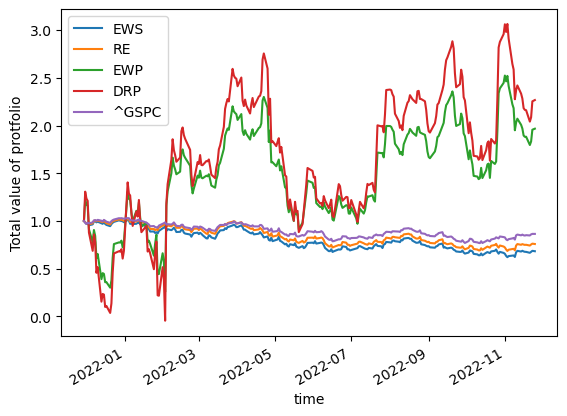

In [33]:
summary.plot()
plt.xlabel('time')
plt.ylabel('Total value of protfolio')
plt.legend()
plt.show()

As we can see from the above figure, DRP and EWP have better performance than Index(^GSPC) most time, but 
EWS and RE have poorer performance than Index(^GSPC).
Finally, DRP strategy get the largest total value of protfolio.

Problem 16

In [34]:
gain = np.zeros(4)
for i in range(4):
    data = eval(lis[i]).values
    gain[i] = data[-1] / data[0]
SD = np.std(summary).values[:4]
Min = summary.min().values[:4]
res = pd.DataFrame({'Gain': gain,
                    'SD': SD,
                    'Min': Min})
res.index = ['EWS', 'RE', 'EWP', 'DRP']
res

,Gain,SD,Min
EWS,0.683393,0.109346,0.621058
RE,0.759080,0.097529,0.686188
EWP,1.966918,0.495860,0.256292
DRP,2.266796,0.677907,-0.044143


As we can see, DRP has the best gain, but also has the highest SD and lowest Min, which shows its high gain comes with high risk together. But for EWP, it has great Gain, and its SD is smaller than DRP, Min bigger than DRP, shows that this strategy has good gain(but less than DRP), but with a lower risk.

Problem 17

In [35]:
returns = summary.apply(np.log).diff().dropna(axis=0, how='all')
returns

,EWS,RE,EWP,DRP,^GSPC
Date,,,,,
2021-11-30,-0.014110,-0.013616,0.199791,0.267992,-0.019143
2021-12-01,-0.017163,-0.012593,-0.043137,-0.056593,-0.011886
2021-12-02,0.006593,0.007983,-0.010444,-0.020083,0.014095
2021-12-03,-0.020555,-0.016999,-0.237180,-0.320269,-0.008484
2021-12-06,0.009549,0.010748,-0.161567,-0.245374,0.011663
...,...,...,...,...,...
2022-11-18,-0.001035,0.001403,0.000578,-0.001590,0.004747
2022-11-21,-0.014712,-0.011217,-0.047143,-0.056724,-0.003891
2022-11-22,0.015994,0.015242,0.020601,0.021819,0.013489


In [36]:
returns["^GSPC"].var()

0.0002294296071126649

In [37]:
returns.cov()

,EWS,RE,EWP,DRP,^GSPC
EWS,0.000459,0.000407,0.000293,0.001178,0.000309
RE,0.000407,0.000366,0.000256,0.000966,0.000280
EWP,0.000293,0.000256,0.023603,0.021891,0.000254
DRP,0.001178,0.000966,0.021891,0.049232,0.000720
^GSPC,0.000309,0.000280,0.000254,0.000720,0.000229


In [38]:
beta = returns.cov().loc['^GSPC','EWS':'DRP']/returns["^GSPC"].var()
beta

EWS    1.348934
RE     1.219498
EWP    1.109251
DRP    3.137525
Name: ^GSPC, dtype: float64

From the aspect of Beta, DRP is the best strategy, EWS is 2nd best strategy, RE is 3rd best strategy, and EWP is the worest among this four strategies.